In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Penguins

In this exercise, we will explore the palmerpenguins dataset.


*Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081*

### Part 5.1
Load the data. Impute missing values of the numerical features, for example by replacing them with the mean value for the respective feature.

In [32]:
path = 'data/penguins.csv' 

# TODO
data = pd.read_csv(path)

print("Before imputation")
print(data.head())

# Impute missing values
numerical_features = data.select_dtypes(include='number').columns.tolist()
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

print()
print("After imputation")
print(data.head())

Before imputation
   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

After imputation
   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen        39.10000       18.70000         181.000000   
1      2  Adelie  Torgersen        39.50000       17.40000         186.000000   
2      3  Adelie  Torgersen        40.30000     

### Part 5.2
Select only the samples belonging to the species Gentoo. Consider the variables ??`flipper_length_mm`, `body_mass_g`, `bill_length_mm`, `bill_depth_mm` and find the corellations between each pair. 

In [33]:
cols = ['flipper_length_mm', 
        'body_mass_g',
        'bill_length_mm', 
        'bill_depth_mm',]

# TODO
gentoo_data = data[data['species'] == 'Gentoo']

selected_features = ['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm']

correlation_matrix = gentoo_data[selected_features].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   flipper_length_mm  body_mass_g  bill_length_mm  \
flipper_length_mm           1.000000     0.711209        0.664356   
body_mass_g                 0.711209     1.000000        0.673636   
bill_length_mm              0.664356     0.673636        1.000000   
bill_depth_mm               0.632712     0.666543        0.607152   

                   bill_depth_mm  
flipper_length_mm       0.632712  
body_mass_g             0.666543  
bill_length_mm          0.607152  
bill_depth_mm           1.000000  


Which pair appears to be most highly corellated?

Most Highly Correlated Pair are ('flipper_length_mm', 'body_mass_g') = 0.711209

### Part 5.3 
Fit a linear model predicting `body_mass_g` from  `bill_depth_mm` for the species Gentoo and show the linear parameters.

In [34]:
# TODO
beta = 0
r2 = 0

X = gentoo_data[['bill_depth_mm']]
y = gentoo_data['body_mass_g']

linear_model = LinearRegression()
linear_model.fit(X, y)

r2 = linear_model.score(X, y)
beta = linear_model.coef_[0]
intercept = linear_model.intercept_


print(f'Coefficient: {np.round(beta, 2)}, R2-score: {np.round(r2, 2)}')
print(f"Intercept: {intercept}")

Coefficient: 339.92, R2-score: 0.44
Intercept: -29.715397325428057


What are the linear parameters and how do you judge the goodness of fit?

Linear parameters are coeffecient & intercept. \
We use R2 value (score) as a measurement to judge the goodness of fit. Higher value indicates a better fit.

### Part 5.4
Now consider the pair of variables `body_mass_g`  and  `bill_depth_mm` over *all* penguin species. Perform a hypothesis test on whether there is  	statistically significant relationship between the predictors. What problem do you see? *Hint: Consider visualizing the relationship between the variables using a scatterplot.*

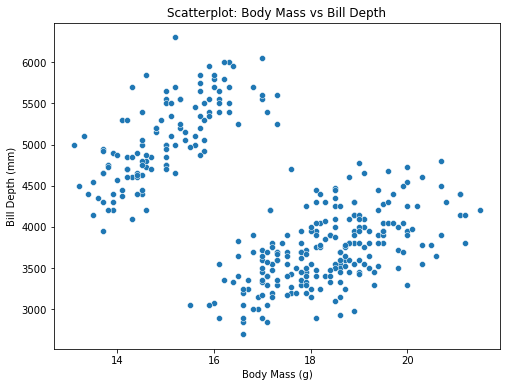

Pearson correlation coefficient: -0.4719156211860666
P-value: 1.7647813131261825e-20
Corel_test(body_mass_g,bill_depth_mm)): True


In [35]:
import seaborn as sns
from scipy.stats import pearsonr

x1 = 'body_mass_g'
x2 = 'bill_depth_mm' 
alpha = 0.05


# Visualize the relationship using seaborn.scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=x1, y=x2)
plt.xlabel('Body Mass (g)')
plt.ylabel('Bill Depth (mm)')
plt.title('Scatterplot: Body Mass vs Bill Depth')
plt.show()

# TODO 
p_val = None
# Hypothesis test - Pearson correlation
pearson_corr, p_val = pearsonr(data[x1], data[x2])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {p_val}")
print(f'Corel_test({x1},{x2})): {None if p_val is None else p_val<alpha}') 

Is there a significant relationship and what problem do you see?

Yes, there is a significant relationship between body_mass and bill_depth. 

### Part 5.5 
Consider again the species Gentoo. Suppose we observe a new penguin with bill length of 17. Using the body mass of its four closest neighbors (in terms of the bill lengths), predict the body mass of the new penguin.

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4)  # considering 4 nearest neighbors
knn_model.fit(X, y)

new_penguin_bill_length = [[17]]  # Bill length of the new penguin
predicted_body_mass = knn_model.predict(new_penguin_bill_length)

print(f"Predicted body mass of the new penguin: {predicted_body_mass[0]} grams")

Predicted body mass of the new penguin: 5650.0 grams


### Part 5.6
Plot the RSS of a $k$NN regression predicting `body_mass_g`  from  `bill_depth_mm` for different choices of $k$ $(k \in \{1, ...,10\})$.

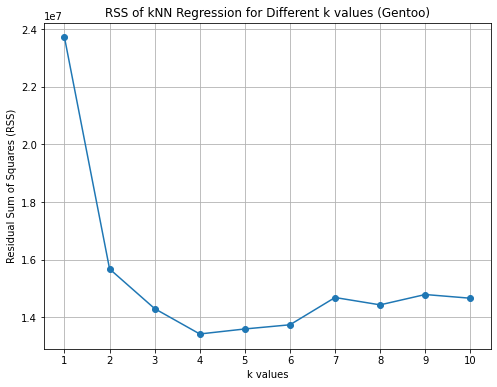

In [36]:
from sklearn.metrics import mean_squared_error

range_k = range(1,11)
rss_values = []

for k in range_k:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X, y)
    predictions = knn_model.predict(X)
    rss = mean_squared_error(y, predictions) * len(y)  # Residual Sum of Squares
    rss_values.append(rss)

# Plotting RSS for different values of k
plt.figure(figsize=(8, 6))
plt.plot(range_k, rss_values, marker='o')
plt.xlabel('k values')
plt.ylabel('Residual Sum of Squares (RSS)')
plt.title('RSS of kNN Regression for Different k values (Gentoo)')
plt.xticks(range_k)
plt.grid(True)
plt.show()

Which $k$ would you choose and why?

We will choose the k=4 because RSS is minimum.